In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [2]:
df = pd.read_csv('Data/Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Check the duplicate rows and deal with them

In [6]:
df.duplicated().sum()

np.int64(127)

### Delete the duplicate rows

In [7]:
df.drop_duplicates(inplace=True)

### Check the null rows

In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Summarize numerical features (mean, median, standard deviation)

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Create basic visualizations

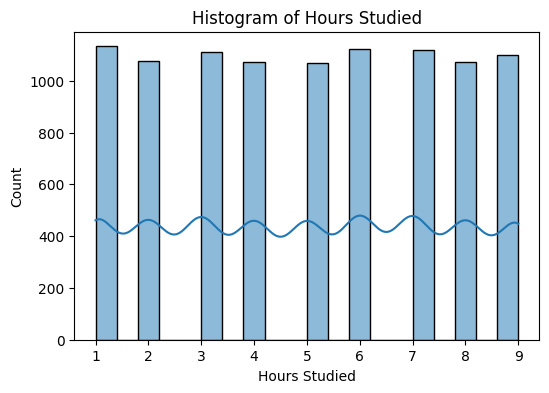

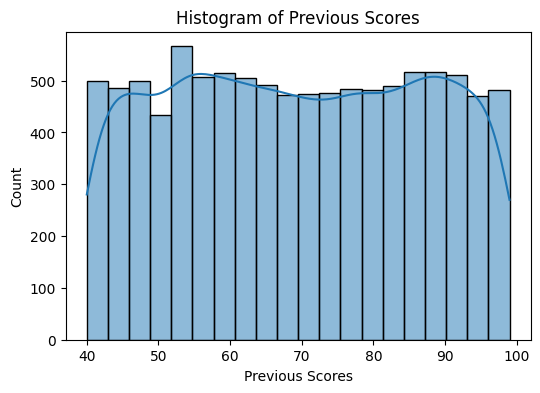

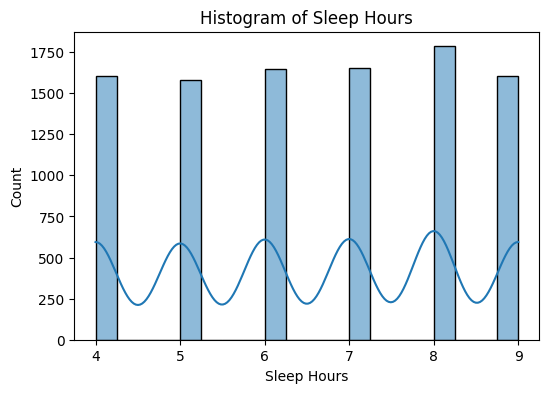

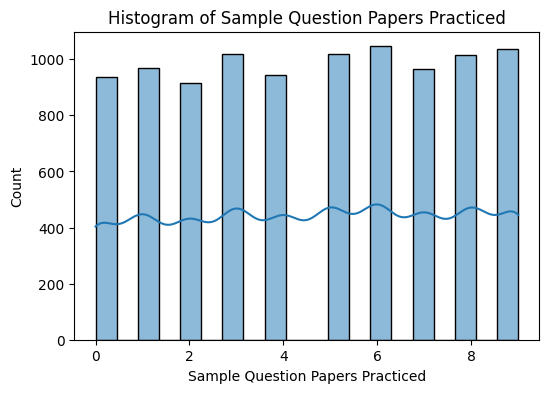

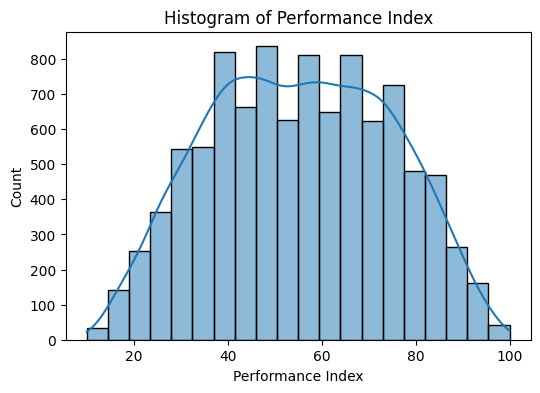

In [10]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


### Outliers checking

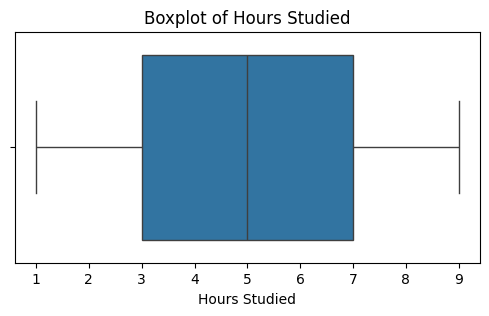

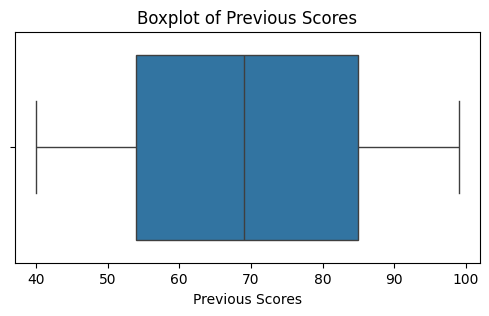

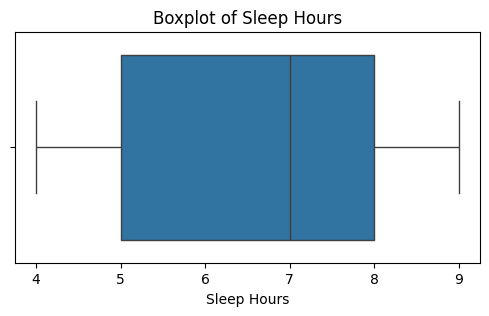

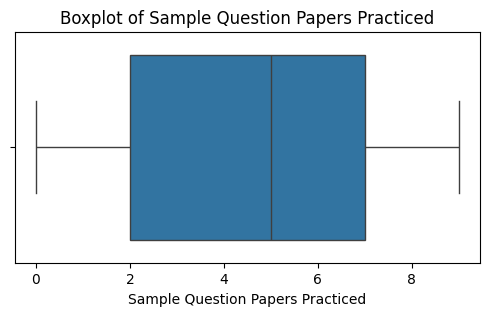

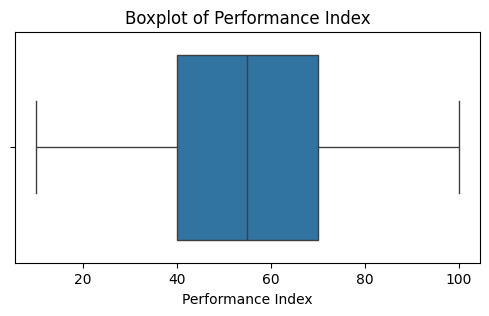

In [11]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Data Preprocessing

### Convert categorical variables into numerical representations.

##### For best practice and for categorical feature that contains (Yes and No) we convert to binary of 0 (No) and 1 (Yes)

In [12]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

### Identify the target variable

In [13]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [14]:
X = df.drop('Performance Index', axis=1) # features
y = df['Performance Index'] # target


### Split the dataset into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       
    random_state=42,       
)

### Select LinearRegression as the algorithm.

In [16]:
model = LinearRegression()

### Train the model on the training set

In [17]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print(f"Coefficients: {model.coef_}")

Coefficients: [2.8510219  1.01843034 0.57382297 0.47207329 0.18870366]


# Evaluate the Model

### Use the testing set to generate predictions (y_pred)

In [19]:
y_pred = model.predict(X_test)

### Evaluate the model with performance metrics such as:

##### Mean Squared Error (MSE)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}") 

MSE: 4.31


#### Root Mean Squared Error (RMSE)

In [26]:
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")

Root Mean Squared Error (RMSE): 2.08


#### R-squared (R²)

In [30]:
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.99
